In [33]:
# Importing important libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
# Loading the dataset
df=pd.read_csv(r'C:\Users\tsasi\Downloads\pima-indians-diabetes-database (1).zip')

In [35]:
# First 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# shape of the dataset
df.shape

(768, 9)

In [37]:
# splitting the dataset in features and target variable
x=df.drop(['Outcome'],axis=1)

In [38]:
# Target variable
y=df.Outcome 

In [39]:
# Splitting dataset into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
# Description of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
df[df.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [43]:
# Create Decision Tree classifier object
clf=DecisionTreeClassifier()

In [44]:
# train decision tree classifier
clf=clf.fit(x_train,y_train)

In [45]:
# predict the response for test dataset
y_pred=clf.predict(x_test)

In [48]:
# checking the accuracy, how often the classifier is correct?
print(accuracy_score(y_test,y_pred))

0.6948051948051948


In [15]:
len(y_test)

154

In [16]:
!pip install graphviz

In [17]:
!pip install pydotplus

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

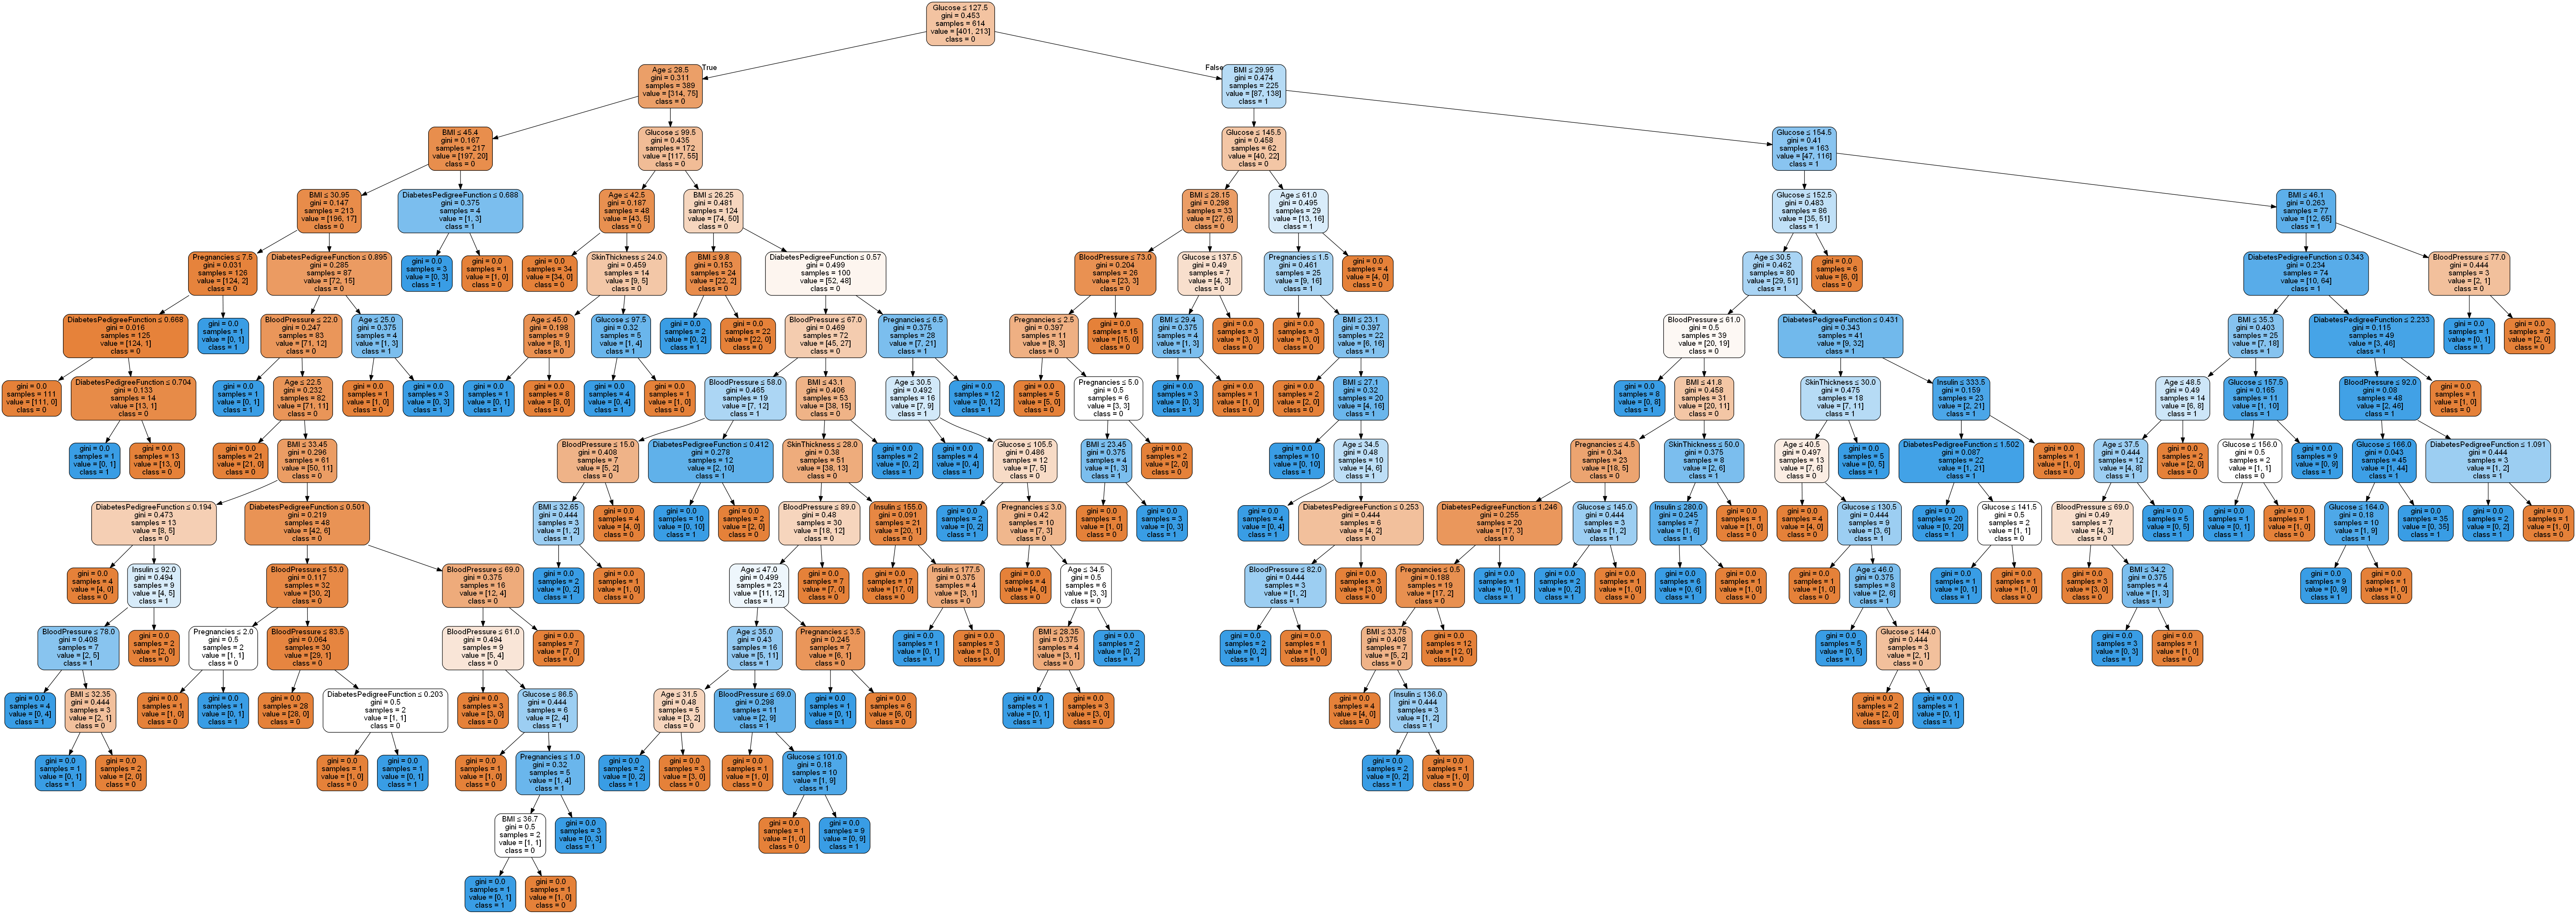

In [19]:
dot_data=StringIO()
export_graphviz(clf,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=x.columns,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [50]:
# create decision tree classifier object
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
# train decision tree classifier
clf=clf.fit(x_train,y_train)
# predict the response for the test dataset
y_pred=clf.predict(x_test)
# testing the accuracy,how often the classifier is correct?
print(accuracy_score(y_test,y_pred))

0.7987012987012987


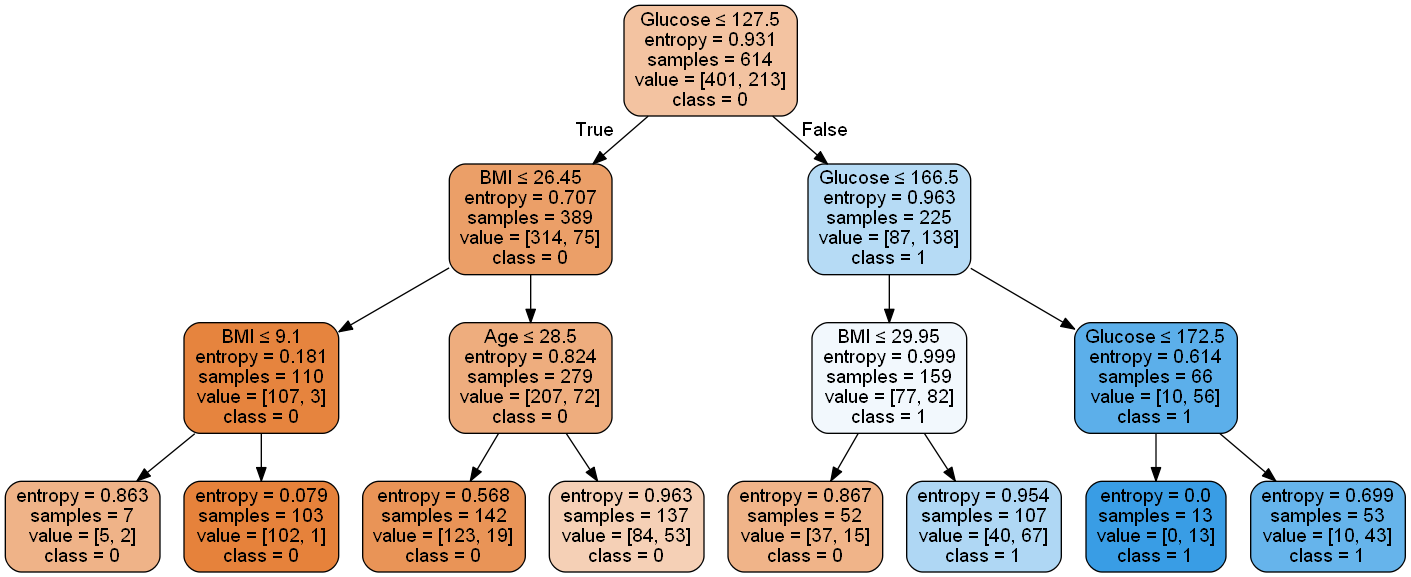

In [53]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [64]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_random_forest=RandomForestClassifier(n_estimators=50)
# train random forest classifier
clf_random_forest.fit(x_train,y_train)
# pedict the response for the test data
y_pred=clf_random_forest.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred))


accuracy_score: 0.8376623376623377


In [71]:
# importing svm 
from sklearn.svm import SVC
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
# predicting the response of the test data
y_pred=clf_svm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7987012987012987


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
# Normalizing the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.2,random_state=1)
from sklearn.svm import SVC
clf_svm=SVC(C=10)
clf_svm.fit(x_train,y_train)
y_pred=clf_svm.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8051948051948052


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [68]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('accuracy score:',accuracy_score(y_pred,y_test))

accuracy score: 0.7792207792207793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
